<a href="https://colab.research.google.com/github/zb15/B2BNetworkWiki/blob/main/Example_B2BNetworkWiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example for B2BNetworkWiki package

Currently the package has 3 main functions:            

1.   choose_company(input_name, search_option='all')
2.   get_companies_network(QIDs, num_runs=(5,5,5,5))
3.   visualise_b2b_network(df)

The **choose_company()** allows user to search companies with various search options: exact match; starts with the input plus space; starts with the input plus comma plus space, or as default all options.
User can search and choose any number of companies, and will need to save the QIDs only to a list to use them in the next function.

The **get_companies_network(QIDs, num_runs=(5,5,5,5))** has 4 set of sub-functions (e.g., has_parent() and if it does then get_parent_info()) to query the different relations (parent, owned by, subsidiary and owner of) plus some cleaning functions. It returns the max 4 dataframes (p_df, ob_df, s_df, oo_df) (empty if it is requested to be 0).  

The **visualise_b2b_network()** function has 2 steps at the moment (that can easily be made into 1 function). The 1st step (with clean_and_join(p_df, ob_df, s_df, oo_df) function) is to clean the 4 datasets and join them together into a "final_df". The WikiData requires a lot of cleaning, handling duplicates etc. and comments are included within (the quite long) code. And the function that visualising the network from "final_df" dataframe (visualise_b2b_network()).


## Import packages

In [ ]:
!pip install pycountry --quiet

In [ ]:
!pip install pycountry-convert --quiet

In [ ]:
!pip install pyvis --quiet

In [ ]:
!pip install B2BNetworkWiki --quiet

## Step 1. Choose companies

Function 1. **choose_company(input_name, search_options='all')**

This function takes two arguments and returns the QID and company name for every results based on the the search option.

The *first* argument is to add the company's name (case sensitive).
The *second* one have 4 different arguments to choose from, but not necesseraly needed. If left out, then by default it is set to return 'all' serach options.
In case User knows the exact company name as appears on WikiData (e.g., "Tesla, Inc."), the 'exact' search option is recommended.

Other search options available are  

*   'space' which will bring results that starts with the given input (e.g., "Tesla ") and
*   'space_comma' which will return results that are starts with user input followed by a comma and a space after (e.g., "Tesla, ").

Once the companies are chosen, which could be any number of companies, their QIDs need to be stored in a list to pass on to the next Function.

In [ ]:
# Choose the first company
company1 = choose_company('Tesla')
company1

[('Q106868050', 'Tesla Energy'),
 ('Q105162434', 'Tesla India'),
 ('Q22674561', 'Tesla Grohmann Automation'),
 ('Q1548225', 'Tesla'),
 ('Q116876087', 'Tesla (Thailand)'),
 ('Q4920135', 'Tesla Electric Light & Manufacturing'),
 ('Q478214', 'Tesla, Inc.'),
 ('Q27150172', 'Tesla US dealership disputes')]

In [ ]:
# Based on the list the company in scope can be choosen
company1[6]

('Q478214', 'Tesla, Inc.')

In [ ]:
# alternatively, with serach_option='exact' the exact company name can be returned
company1_exact = choose_company('Tesla, Inc.', 'exact')
company1_exact

[('Q478214', 'Tesla, Inc.')]

In [ ]:
# Choose a second company
company2 = choose_company('Polestar')
company2

[('Q4047174', 'Polestar')]

In [ ]:
# create a list of tuples from the chosen companies
company1and2 = [company1_exact[0],company2[0]]
company1and2

[('Q478214', 'Tesla, Inc.'), ('Q4047174', 'Polestar')]

In [ ]:
company1and2 = [company1[6],company2[0]]
company1and2

[('Q478214', 'Tesla, Inc.'), ('Q4047174', 'Polestar')]

In [ ]:
# create a QIDs list to store every chosen company's unique ID number that will
# be used as a base to explore their B2B relations
QIDs = [x[0] for x in company1and2]
print(QIDs)

['Q478214', 'Q4047174']


## Step 2. Get the companies network

Function 2. **get_companies_network(QIDs, (5,5,5,5))**

This function takes two arguments and returns 4 dataframes in a dictionary (even if any of the dataframe is empty).   

The *first* argument needs to be a list of unique IDs starting with Q, that could be matched and used for query WikiData.
The *second* one have 4 values in the argument to specify
what level of each relations the user is interested. By default it is set to (5,5,5,5), and in that case could just add the first args. The levels could be specified as >0 integers. Beyond 5 levels in case big corporations it could take several minutes to return the results. The first postion is to get parent companies, the second position is still upward relation, is to get owned by relations. For example if User only interested in upwards relations for 3 levels of the chosen companies, then it could be specified as (3,3,0,0). The last two position is for to get subsidiaries and owner of relations.


In [ ]:
QIDs

['Q478214', 'Q4047174']

In [ ]:
# to get the companies network, it needs the QIDs as the first argument, \
# and for 2nd the number of levels to run can be specified for each relations \
# such as (parent / owned by / subsidiary / owner of) where, \
# the first two numbers are upwards relations and the last two are downwards.
test = get_companies_network(QIDs, (5,5,5,5))

In [ ]:
# the output is a python dictionary of dataframes, which are named \
# p_df for parent company query results \
# ob_df stands for owned by \
# s_df is for subsidiary \
# oo_df is for the owner of results.
test.keys()

dict_keys(['p_df', 'ob_df', 's_df', 'oo_df'])

In [ ]:
print(len(test)) # 4 dataframes: p_df, ob_df, s_df, oo_df
print(len(test['p_df'])) # no of times the dataset was appended
print(len(test['p_df'][-1])) # results of the last run

4
5
41


In [ ]:
print(len(test)) # 4 dataframes: p_df, ob_df, s_df, oo_df
print(len(test['ob_df'])) # no of times the dataset was appended
print(len(test['ob_df'][-1])) # results of the last run

4
5
62


In [ ]:
print(len(test)) # 4 dataframes: p_df, ob_df, s_df, oo_df
print(len(test['s_df'])) # no of times the dataset was appended
print(len(test['s_df'][-1])) # results of the last run

4
5
97


In [ ]:
print(len(test)) # 4 dataframes: p_df, ob_df, s_df, oo_df
print(len(test['oo_df'])) # no of times the dataset was appended
print(len(test['oo_df'][-1])) # results of the last run

4
5
72


In [ ]:
p_data = test['p_df'][-1]
p_data.tail()

,item,QID,itemLabel,itemcountryLabel,industries,parent,pQID,parentLabel,parentcountryLabel,pindustries,proportion,proportionofLabel,pointoftime,starttime,endtime
36,http://www.wikidata.org/entity/Q1201531,Q1201531,Detroit Diesel,United States of America,automotive industry,http://www.wikidata.org/entity/Q16834431,Q16834431,Daimler Truck North America,United States of America,automotive industry,NaN,NaN,NaN,NaN,NaN
37,http://www.wikidata.org/entity/Q2378642,Q2378642,Thomas Built Buses,NaN,automotive industry,http://www.wikidata.org/entity/Q16834431,Q16834431,Daimler Truck North America,United States of America,automotive industry,NaN,NaN,NaN,NaN,NaN
38,http://www.wikidata.org/entity/Q1107991,Q1107991,BharatBenz,India,automotive industry,http://www.wikidata.org/entity/Q5209438,Q5209438,Daimler India Commercial Vehicles Pvt. Ltd.,NaN,automotive industry,NaN,NaN,NaN,NaN,NaN
39,http://www.wikidata.org/entity/Q386598,Q386598,EvoBus,Germany,automotive industry,http://www.wikidata.org/entity/Q1157624,Q1157624,Daimler Truck,Germany,automotive industry,NaN,NaN,NaN,NaN,NaN
40,http://www.wikidata.org/entity/Q5209438,Q5209438,Daimler India Commercial Vehicles Pvt. Ltd.,NaN,automotive industry,http://www.wikidata.org/entity/Q1157624,Q1157624,Daimler Truck,Germany,automotive industry,NaN,NaN,NaN,NaN,NaN


In [ ]:
# the returned dataframes should not contain any duplicates
p_data2 = p_data.drop_duplicates()
p_data2.tail()

,item,QID,itemLabel,itemcountryLabel,industries,parent,pQID,parentLabel,parentcountryLabel,pindustries,proportion,proportionofLabel,pointoftime,starttime,endtime
36,http://www.wikidata.org/entity/Q1201531,Q1201531,Detroit Diesel,United States of America,automotive industry,http://www.wikidata.org/entity/Q16834431,Q16834431,Daimler Truck North America,United States of America,automotive industry,NaN,NaN,NaN,NaN,NaN
37,http://www.wikidata.org/entity/Q2378642,Q2378642,Thomas Built Buses,NaN,automotive industry,http://www.wikidata.org/entity/Q16834431,Q16834431,Daimler Truck North America,United States of America,automotive industry,NaN,NaN,NaN,NaN,NaN
38,http://www.wikidata.org/entity/Q1107991,Q1107991,BharatBenz,India,automotive industry,http://www.wikidata.org/entity/Q5209438,Q5209438,Daimler India Commercial Vehicles Pvt. Ltd.,NaN,automotive industry,NaN,NaN,NaN,NaN,NaN
39,http://www.wikidata.org/entity/Q386598,Q386598,EvoBus,Germany,automotive industry,http://www.wikidata.org/entity/Q1157624,Q1157624,Daimler Truck,Germany,automotive industry,NaN,NaN,NaN,NaN,NaN
40,http://www.wikidata.org/entity/Q5209438,Q5209438,Daimler India Commercial Vehicles Pvt. Ltd.,NaN,automotive industry,http://www.wikidata.org/entity/Q1157624,Q1157624,Daimler Truck,Germany,automotive industry,NaN,NaN,NaN,NaN,NaN


In [ ]:
# to look into the subsidiary dataframe
s_data = test['s_df'][-1]
s_data.tail()

,item,QID,itemLabel,itemcountryLabel,industries,subsidiary,sQID,subsidiaryLabel,subsidiarycountryLabel,sindustries,proportion,proportionofLabel,pointoftime,starttime,endtime
93,http://www.wikidata.org/entity/Q833456,Q833456,Rolls-Royce Power Systems,Germany,mechanical engineering,http://www.wikidata.org/entity/Q1880663,Q1880663,Woodward L'Orange GmbH,Germany,mechanical engineering,NaN,NaN,NaN,NaN,NaN
94,http://www.wikidata.org/entity/Q181114,Q181114,Stellantis North America,United States of America,automotive industry,http://www.wikidata.org/entity/Q4807118,Q4807118,Askam,Turkey,automotive industry,NaN,NaN,NaN,1962-01-01T00:00:00Z,1978-01-01T00:00:00Z
95,http://www.wikidata.org/entity/Q181114,Q181114,Stellantis North America,United States of America,automotive industry,http://www.wikidata.org/entity/Q5767794,Q5767794,Chrysler Fevre Argentina S.A.,Argentina,automotive industry,NaN,NaN,NaN,1959-01-01T00:00:00Z,1979-01-01T00:00:00Z
96,http://www.wikidata.org/entity/Q181114,Q181114,Stellantis North America,United States of America,automotive industry,http://www.wikidata.org/entity/Q1789249,Q1789249,Street & Racing Technology,United States of America,automotive industry,NaN,NaN,NaN,NaN,NaN
97,http://www.wikidata.org/entity/Q30378,Q30378,Kamaz,Russia,automotive industry,http://www.wikidata.org/entity/Q16699372,Q16699372,ZMA,Russia,automotive industry,NaN,NaN,NaN,NaN,NaN


In [ ]:
# without specifying the 2nd argument, will bring the same default levels of (5,5,5,5)
test2 = get_companies_network(QIDs)


In [ ]:
print(len(test2)) # 4 dataframes: p_df, ob_df, s_df, oo_df
print(len(test2['oo_df'])) # no of times the dataset was appended
print(len(test2['oo_df'][-1])) # results of the last run

4
5
71


## Step 3. Clean and join the dataframes into one, and then ***visualise the network***

The **visualise_b2b_network()** function has 2 steps at the moment. The 1st step (with *clean_and_join(p_df, ob_df, s_df, oo_df)* function) is to clean the 4 datasets and join them together into one dataframe. It can take up to several minutes depending on the dataset sizes, and that is one of the reason these steps are seperated (it could also be used for other tasks not just visualising the network). The WikiData requires lots of cleaning, handling duplicates etc. and comments are included within the code file. It covers the following main cleaning processes (with assumptions):


*   drop duplicates from each datasets (beyond exact same records):

      *   if proportion has values for both 'authorised capital' and 'voting interest' then only 'authorised capital' is kept;
      *   the record with the most recent date is kept, the older one(s) dropped;
      *   match the industries (it could result in duplicates the same pair with exactly same values for each column except the randomness that could happen when there are more then one industry is listed for either or both of the companies);


*   mark those records that has an end date with a value of "4" in the proportion column in order to differentiate them on the graph

*   mark parent relations (where no proportion is known) with a value of "2" for visualisation purposes

*   mark those proportions that not know values with a value of "3" for the same purpose as before

*   in case a company has more than one industry, then based on the most frequent industries in the ecosystem of the queried companies, the most frequent ones will be used for visualisation purposes (but all industries will be listed next to the company name once User hover over the node)

*   any record that has no industries, then it will be checked if it is a human and or something else (e.g., a brand) and the brief discription will be visible instead of the industries on the graph

*   countries will be visible next to the company names on the graph once User hover over the nodes, while the continent it belongs will be seen as various shapes of the nodes

*   the final joined dataframe will have parent and child classification only for the companies, where the parent means the parent and owned by relations; and the child means both subsidiary and owner of relations.


**Function 3.2** takes the resulting dataframe and visualise the network with the use of PyVis package (with the function *visualise_b2b_network(df)*).


*   The code will return a .html file that can be downloaded from colab and open in any browser. It is a dynamic graph, that could be dragged as User wishes to explore more the details.

*   Once the graph .html file opened, on top of the screen there are some built in filter functions. Each company could searched by name (Select node..).  The Select a network item has the option of nodes or edges. For example, certain industries could be highlighted from nodes -> groups -> then any industries from the graph can be choosen from a list (or typed in).



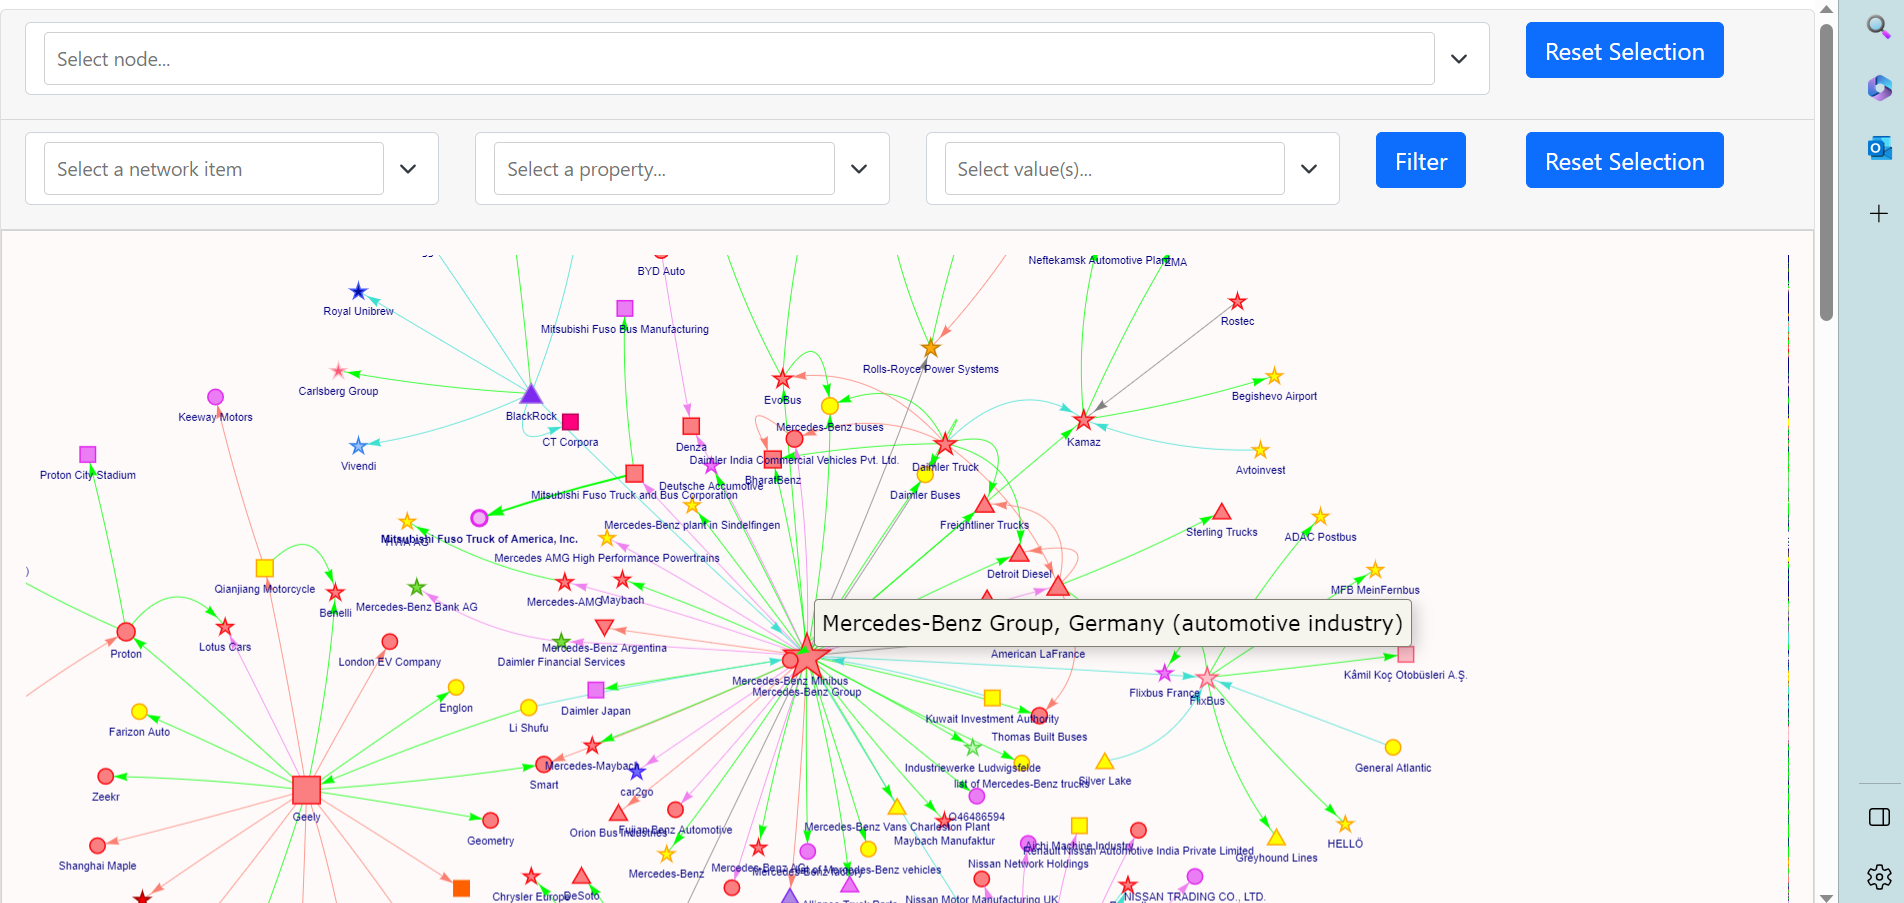













*   Visual guides:

    *   the **nodes** are colour coded by the top industries (it is randomly assigned each time when the function is being called and a new .html file returned)
    *   the nodes could take up to 7 shapes:

        1.   North America - triangle (pointing up)
        2.   South America - triangleDown (pointing down)
        3.   Europe - star
        4.   Africa - diamond
        5.   Asia - square
        6.   Australia - ellipse
        7.   Antartica (and anything else, such as unknown values) - dot

   *   The network is directed, **edges** pointing from parent organisation toward child companies. The edges are colour coded and could take up to 5 colours and comments while hovering over:
        
       1.   parent company (colour: salmon)
       2.   proportion of shares that are greater than 0, but smaller than 0.5 (coulour: turquoise)
       3.   proportion of shares that are >=0.5 but <=1 (colour: violet)
       4.   where no data available on WikiData commented as "unknown" (colour: lime)
       5.   those relation that ended are commented with their end date (colour: grey)

   *   There is also an option for user to adjust the physics of the network graph. It's panel is located below the graph.




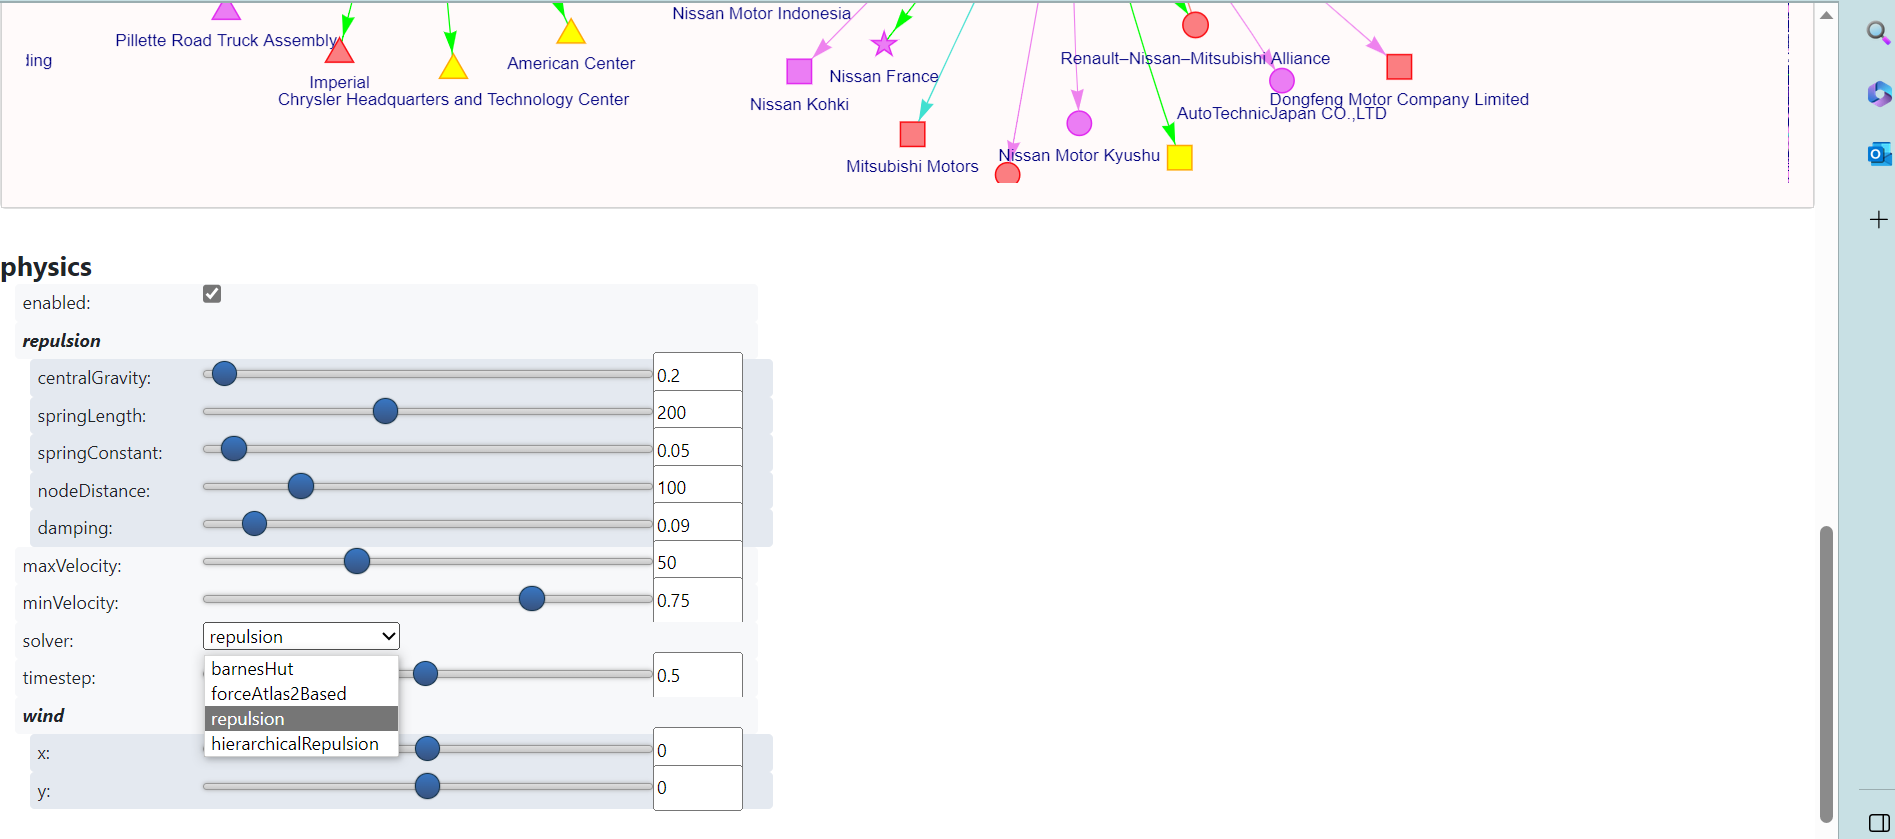

### Step 3.1 clean and join the dataframes

In [ ]:
# need to be able to pass on the dataframes that is needed for the visualisation
# in this case the last run, which includes the 5 levels both upwards and downwards
p_df = test['p_df'][-1] # p for parent
ob_df = test['ob_df'][-1] # ob for owned by
s_df = test['s_df'][-1] # s for subsidiary
oo_df = test['oo_df'][-1] # oo for owner of

In [ ]:
# the function clean_join() needs these 4 dataframes, - in this exact order - even if they are empty.
#
f_df = clean_join(p_df, ob_df, s_df, oo_df)
f_df.head()

<ipython-input-37-c9084d13663d>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'proportion'] = 4
<ipython-input-37-c9084d13663d>:46: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:, 'proportion'] = 4
<ipython-input-37-c9084d13663d>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,pQID,parent,parent_country,p_industries,cQID,child,child_country,c_industries,p_proportion,proportionofLabel,pointoftime,starttime,endtime,top_p_industries,top_c_industries,parent_continent,child_continent
0,Q478214,"Tesla, Inc.",United States of America,solar industry; automotive industry; battery i...,Q75327597,Gigafactory Berlin-Brandenburg,Germany,"Factory in Grünheide, Germany",3.0,NaN,nan,nan,nan,solar industry,other,North America,Europe
1,Q478214,"Tesla, Inc.",United States of America,solar industry; automotive industry; battery i...,Q28221306,Giga New York,United States of America,photovoltaic (PV) cell factory,3.0,NaN,nan,nan,nan,solar industry,other,North America,North America
2,Q478214,"Tesla, Inc.",United States of America,solar industry; automotive industry; battery i...,Q7705509,Tesla Fremont Factory,United States of America,automotive industry,3.0,NaN,nan,nan,nan,solar industry,automotive industry,North America,North America
3,Q478214,"Tesla, Inc.",United States of America,solar industry; automotive industry; battery i...,Q7555824,SolarCity,United States of America,solar industry,2.0,NaN,nan,2016-11-21T00:00:00Z,nan,solar industry,solar industry,North America,North America
4,Q478214,"Tesla, Inc.",United States of America,solar industry; automotive industry; battery i...,Q55642234,Giga Shanghai,People's Republic of China,electric vehicle factory,3.0,NaN,nan,nan,nan,solar industry,other,North America,Asia


In [ ]:
f_df.tail()

,pQID,parent,parent_country,p_industries,cQID,child,child_country,c_industries,p_proportion,proportionofLabel,pointoftime,starttime,endtime,top_p_industries,top_c_industries,parent_continent,child_continent
174,Q181114,Stellantis North America,United States of America,automotive industry,Q5114658,Chrysler Headquarters and Technology Center,United States of America,"building in Michigan, United States",3.0,NaN,nan,nan,nan,automotive industry,other,North America,North America
175,Q181114,Stellantis North America,United States of America,automotive industry,Q29610,Chrysler,United States of America,automotive industry,3.0,NaN,nan,nan,nan,automotive industry,automotive industry,North America,North America
176,Q833456,Rolls-Royce Power Systems,Germany,mechanical engineering,Q1880663,Woodward L'Orange GmbH,Germany,mechanical engineering,3.0,NaN,nan,nan,nan,mechanical engineering,mechanical engineering,Europe,Europe
177,Q833456,Rolls-Royce Power Systems,Germany,mechanical engineering,Q548006,MTU Friedrichshafen,Germany,automotive industry,3.0,NaN,nan,nan,nan,mechanical engineering,automotive industry,Europe,Europe
178,Q26966,Mercedes-AMG,Germany,automotive industry,Q552702,HWA AG,Germany,public company,3.0,NaN,nan,nan,nan,automotive industry,other,Europe,Europe


In [ ]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pQID               179 non-null    object 
 1   parent             179 non-null    object 
 2   parent_country     179 non-null    object 
 3   p_industries       179 non-null    object 
 4   cQID               179 non-null    object 
 5   child              179 non-null    object 
 6   child_country      179 non-null    object 
 7   c_industries       179 non-null    object 
 8   p_proportion       179 non-null    float64
 9   proportionofLabel  0 non-null      object 
 10  pointoftime        179 non-null    object 
 11  starttime          179 non-null    object 
 12  endtime            179 non-null    object 
 13  top_p_industries   179 non-null    object 
 14  top_c_industries   179 non-null    object 
 15  parent_continent   179 non-null    object 
 16  child_continent    179 non

### Step 3.2 visualise_b2b_network(df)

In [ ]:
# the function just need to be called and will return a .html file that can be downloaded and opened locally\
# it also display it within Jupyter notebook (but not in within Colab notebook)
visualise_b2b_network(f_df)